In [1]:
import cv2

In [7]:
class ShapeDetector:
  def __init__(self):
    pass
  def detect(self,c):
    shape='unidentified'
    peri=cv2.arcLength(c,True)
    approx=cv2.approxPolyDP(c,0.04*peri,True)

    # if the shape is a triangle, it will have 3 vertices
    if len(approx) == 3:

      shape = "triangle"
		# if the shape has 4 vertices, it is either a square or
		# a rectangle
    elif len(approx) == 4:
			# compute the bounding box of the contour and use the
			# bounding box to compute the aspect ratio
      (x, y, w, h) = cv2.boundingRect(approx)
      ar = w / float(h)
			# a square will have an aspect ratio that is approximately
			# equal to one, otherwise, the shape is a rectangle
      shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
		# if the shape is a pentagon, it will have 5 vertices
    elif len(approx) == 5:
      shape = "pentagon"
		# otherwise, we assume the shape is a circle
    else:
      shape = "circle"
		# return the name of the shape
    return shape


In [8]:
import imutils

In [10]:
image = cv2.imread('shapes_and_colors.png')
resized = imutils.resize(image, width=300)
ratio = image.shape[0] / float(resized.shape[0])

In [11]:
# convert the resized image to grayscale, blur it slightly,
# and threshold it
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

In [12]:
# find contours in the thresholded image and initialize the
# shape detector
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
sd = ShapeDetector()

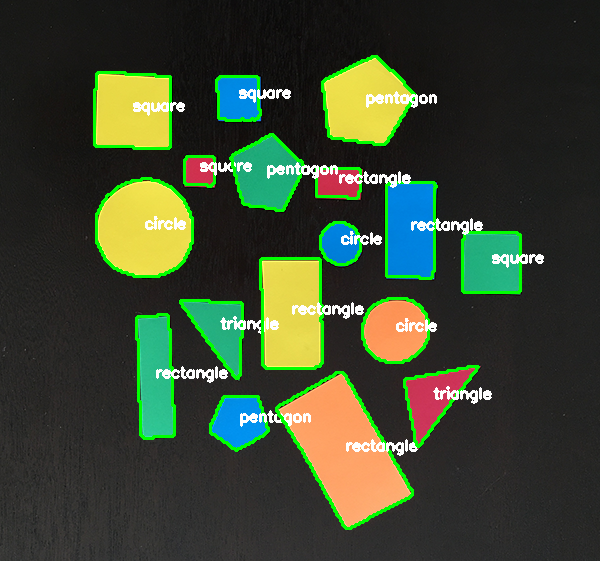

-1

In [24]:
# loop over the contours
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

for c in cnts:


	# compute the center of the contour, then detect the name of the
	# shape using only the contour
	M = cv2.moments(c)
	cX = int((M["m10"] / M["m00"]) * ratio)
	cY = int((M["m01"] / M["m00"]) * ratio)
	shape = sd.detect(c)
	# multiply the contour (x, y)-coordinates by the resize ratio,
	# then draw the contours and the name of the shape on the image
	c = c.astype("float")
	c *= ratio
	c = c.astype("int")
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
	cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
		0.5, (255, 255, 255), 2)
	# show the output image

cv2_imshow( image)
cv2.waitKey(0)
